## GENERATING THE DDBB OF PICTURES TO TRAIN THE MODEL




1. choosing the brush stroke:
    - from the brush stroke data base, randomly select a bs shape, (./data/brush_strokes/00_bs_db/) (1 to n bs's at time)
    - apply transformations (size, rotation degrees, mirror,..) 
    - select a color from the palette  https://stackoverflow.com/questions/28999287/generate-random-colors-rgb
    

2. painting:
    - include the bs in the frame,
    - random location, 
    - retain the new variable "deepness"
    
    
    
  ____  
   
### Notas a tener en cuenta:
    - concentración de pinceladas en el mismo sitio (por el tema de aleatoriedad)
    - trabajar con paletas de colores o randoms que produzcan saltos controlados entre un color y otro (evitar concentración en el mismo color,.. )
    - permitir que se den varias pinceladas en el mismo color (dejando que se elijan 1 o mas bs de cada selección)
    - si existe superposición de colores completa, desestimar el bs que ha desaparecido en su totalidad ocultado por otro posterior.
    - dar un color inicial al fondo
    - formato del frame en el que trabajar, a partir de varios modelos o en modo aleatorio, horizontal,vertical??
    - ...
____________________



## Posible plan B ...¿?


    Crear una app que a partir de una foto de un cuadro + una foto de combinación de colores (reconocer los colores de la foto). Cree un cuadro, similar al de la foto inicial pero con los colores extraidos del input2.
    Generar pinturas, fotos,... etc a partir de colores que se extraen de algún sitio --- mediante foto /video....
 
 



In [7]:
#!pip install colourlovers     descartado, encontrado un punto a seguir que no era este

In [1]:
import numpy as np
import cv2

_____
### NOTA: Ver como se ha desarrollado este proyecto, transmisión de técnica pictórica

https://github.com/matteo-ronchetti/Pointillism/commit/cb6d4454b636488fc2a1993b93f338a2341ba459

____

In [2]:
#https://github.com/matteo-ronchetti/Pointillism/commit/cb6d4454b636488fc2a1993b93f338a2341ba459
# utilizar esta función para repartir las coordenadas de los bs en toda la dimensión del frame, analizarla en detalle, 
#muy útil. Ver si se puede jugar un poco a que el reparto sea mas desigual
import cv2
import random

import matplotlib.pyplot as plt


def randomized_grid(h, w, scale):
    if ( scale==0):
        scale=min(h,w)//3
    assert (scale > 0)

    r = scale//2

    grid = []
    for i in range(0, h, scale):
        for j in range(0, w, scale):
            y = random.randint(-r, r) + i
            x = random.randint(-r, r) + j

            grid.append((y % h, x % w))

    random.shuffle(grid)
    return grid
    
#type(grid)
#len(grid)
#type(grid[0])
def plot_grid(grid):
    x_val = [x[0] for x in grid]
    y_val = [x[1] for x in grid]
    
    plt.scatter(x_val,y_val)
    plt.show()




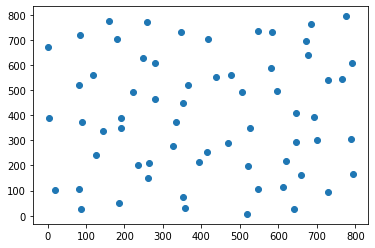

In [3]:
#llamada____________________

grid_g = randomized_grid(h=800, w=800,scale=100)

plot_grid (grid=grid_g)
    

#path_bs='./data/brush_strokes/'
#img = cv2.imread(path_bs + "bs_01.jpg")
#grid = randomized_grid(img.shape[0], img.shape[1], scale=min(img.shape[0],img.shape[1])//5)

#print (img.shape[0],img.shape[1], img.shape[0]*img.shape[1], len(grid))
#print(img.shape[0]*img.shape[1]/len(grid))

## Paleta de colores 

primeros intentos
https://codeboje.de/fun-colors-or-making-art-python/

Palette from picture https://kylermintah.medium.com/coding-a-color-palette-generator-in-python-inspired-by-procreate-5x-b10df37834ae




## para aplicar colores a los bs
https://stackoverflow.com/questions/28999287/generate-random-colors-rgb

##### ver si puedo modificar la selección de colores del modo siguiente:
- elegir los colores de algún sitio (es un plus- plus para despuès, aunque no necesario)
- ver si hay características, además del grado de pastel, que se puedan parametrizar
- limitar a colores que se alejen del blanco o negro .. que se alejen de extremos.





In [4]:
#https://gist.github.com/adewes/5884820

import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def get_random_color(pastel_factor = 0.5):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]

def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])

def generate_new_color(existing_colors,pastel_factor = 0.5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color

def generate_palette(n_colors,pastel_factor=0.5):
    palette_color = []

    for i in range(0,n_colors):
        palette_color.append(generate_new_color(palette_color,pastel_factor = pastel_factor))
       # print(palette_color)
    return palette_color  

   

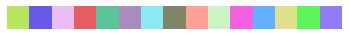

In [5]:
#https://stackoverflow.com/questions/51728957/create-a-color-palette-image-from-a-list-of-rgb-color
#llamada____________________

palette = generate_palette(15,pastel_factor=0.5)

palette_array = np.array(palette)[np.newaxis, :, :]
#print(palette_array)
plt.imshow(palette_array)
plt.axis('off')
plt.show()

In [6]:
palette_array.shape

(1, 15, 3)

### Pintar sobre un frame
- seleccionar frame vertical/horizontal....a partir de unas medidas +- limitadas
- random del número de elementos a pintar (rango limitado)
- random del elemento de nuestra bs_db
- random del número de colores a usar (rango limitado)
- a partir del dato anterior, crear paletta
- pintar en el frame a partir de una selección de centros aleatoria
- 


**Notas**
- si tenemos + puntos que colores, se puede repetir algún color. Coger color aleatorio hasta terminar con los posibles, utilizar todos si los puntos de los bs son <= n_colores en paletta.
- que se puedan seleccionar varias figuras para un mismo color, 1 a n (n puede ser 3-5, testear)



In [7]:
#db of  brush strokes images in list

import os

# folder path
dir_path = './data/brush_strokes/00_bs_db/'

# list to store files
lst_bs = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        lst_bs.append(path)
#print(lst_bs, len(lst_bs))


In [11]:
from PIL import Image
import random

paint_path = './data/brush_strokes/02_paintings/'

def paint_generator (paint_idx):   
    
#random parameters

    lst_frame_sizes=[(600,600),(400,600),(600,400),(800,400),(400,800),(600,200), (200,600),(200,200),(400,400)]


    #______________frame selection from the list
    frame_size=random.choice(lst_frame_sizes)

    print("Randomly selected frame size:",frame_size)

    bs_centers = randomized_grid(h=frame_size[0], w=frame_size[1],scale=75) # valorar introducir la scale en un random limitado
    
    plt.axis([0, frame_size[0],0, frame_size[1]])    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plot_grid (grid=bs_centers)
    plt.show()

    print('Num de brush strokes {}. Donde las coordenadas de los centroides{}:'.format(len(bs_centers),bs_centers))


    #______________elegir aleatoriamente n=len(bs_centers) centroides donde se van a situar los bs, selección de bs
    bs_select=random.sample(lst_bs, len(bs_centers))
    print("brush strokes seleccionados de la db de bs:", bs_select)

    #______________ seleccionar un angulo para girar la figura [0,360]
    lst_degrees=[x for x in range(360)]
    degree=random.sample(lst_degrees, len(bs_centers))
    print("grados de giro para los bs:", degree)

    #______________añadir un cambio en el tamaño del bs en base a un %. Rango elegido :de -30 a 30
    lst_pct=[(x) for x in range(100,250)]
    lst_scale_percent=random.sample(lst_pct, len(bs_centers))
    print("escala de tamaño a aplicar en %:", lst_scale_percent)

    #______________colors
    palette = generate_palette(len(bs_centers),pastel_factor=0.5)
    palette_array = np.array(palette)[np.newaxis, :, :]
    plt.imshow(palette_array)
    plt.axis('off')
    plt.show()
    lst_colors=palette_array.tolist()
    print('Array con los rgb de la paleta seleccionada {}.'.format(lst_colors))
    
    
#painting

    #generating the frame from frame_size
    blank_image = np.zeros((frame_size[0],frame_size[1],3), np.uint8)
    #adding bs's en bs_centers, en el color de la paleta
    #[0]
    lst_imag=[]
    for k in range (len(bs_centers)):

        bs=bs_select[k]
        bs_xy=bs_centers[k]
        bs_color=lst_colors[0][k]
        bs_scale=lst_scale_percent[k]
        bs_angle=degree[k]

        #print ("\n figura bs:",bs,"\n coord:",bs_xy,"\n color:",bs_color,'\n scale:',bs_scale,"\n angle:",bs_angle )
        #blank_image[bs_xy[0],bs_xy[1]]=bs_color

        #rotation
        bs_k_im=Image.open(dir_path + bs)
        rotated=bs_k_im.rotate(bs_angle, expand=True)
        bs_k = np.asarray(rotated)

        #resize
        width = int(bs_k.shape[1] * (1 + bs_scale / 100))
        height = int(bs_k.shape[0] * (1 +  bs_scale / 100))
        #print(bs_k.shape[0],bs_k.shape[1])
        bs_k = cv2.resize(bs_k, (width, height))


        #centramos el bs en el punto donde tenemos que colocarlo
        bs_center=(int(bs_k.shape[0] /2) , int(bs_k.shape[1] /2))
        adjust=(bs_xy[0]-bs_center[0],bs_xy[1]-bs_center[1])

        rgb_tresh=200
        (x,y) = np.where((bs_k[:,:, 0] > rgb_tresh) & (bs_k[ :,:, 1] > rgb_tresh) & (bs_k[:, :, 2] >  rgb_tresh))
        (x,y) = (x + adjust[0], y + adjust[1] )
        
            
        #generamos un array de imagenes donde layer=index_array =orden_de_pintura =k 
        imag_k = np.ones((frame_size[0],frame_size[1],3),np.float64)  

        x2= x[(y< frame_size[1]) & (x <frame_size[0]) & (x>0) & (y>0)]
        y2= y[(y< frame_size[1]) & (x <frame_size[0]) & (x>0) & (y>0) ]
        x=x2
        y=y2
        imag_k[x,y] = lst_colors[0][k]

        lst_imag.append(imag_k)
        #print(imag_k.shape, lst_colors[0][k])
        #print the image kept in list, first we need to transpose
        #imag_k_t= imag_k.transpose(1, 0, 2)
        #print(imag_k_t.shape)
        #plt.axis([0, frame_size[0],0, frame_size[1]])
        #plt.imshow(imag_k_t)     
        

        #implot = plt.imshow(blank_image)

        #plt.axis('equal')
        #plt.xlim(0, frame_size[0]) 
        #plt.ylim(0, frame_size[1])
        #plt.scatter(x,y,color=lst_colors[0][k])
        plt.scatter(x,y,color=[lst_colors[0][k]],s=1, alpha=1)
        #print the image kept in list
       
    


        #plt.show()
        #bs_k_im
   
    
    plt.axis([0, frame_size[0],0, frame_size[1]])
    plt.gca().set_aspect('equal', adjustable='box')
    
    #para guardar, eliminamos los ejes
    plt.axis('off')
    plt.savefig(paint_path + "paint_" + ("0"*4 + str(paint_idx))[-5:]  + ".png")
    
    #para mostrar, dejamos los axis
    plt.axis('on')    
    plt.show()
    
    
    
    #plt.xlim(0, frame_size[0]) 
    #plt.ylim(0, frame_size[1])
    return lst_imag    
    
    

Randomly selected frame size: (600, 600)


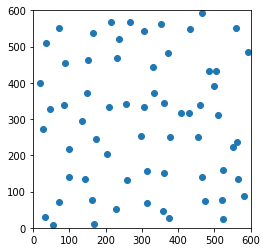

Num de brush strokes 64. Donde las coordenadas de los centroides[(150, 371), (359, 47), (375, 26), (371, 481), (305, 333), (456, 250), (460, 338), (18, 400), (135, 296), (46, 329), (230, 51), (510, 312), (409, 317), (209, 333), (474, 74), (307, 542), (85, 340), (582, 89), (592, 485), (563, 236), (485, 432), (205, 204), (298, 253), (506, 434), (521, 76), (71, 71), (174, 244), (267, 568), (466, 139), (565, 136), (259, 133), (99, 141), (231, 468), (56, 8), (314, 68), (89, 454), (361, 343), (144, 136), (33, 31), (330, 445), (560, 550), (466, 593), (215, 569), (313, 156), (166, 537), (430, 318), (169, 10), (334, 371), (237, 521), (152, 463), (163, 76), (523, 159), (98, 217), (498, 392), (28, 273), (71, 551), (551, 224), (353, 562), (257, 342), (434, 548), (35, 509), (361, 151), (379, 251), (525, 23)]:
brush strokes seleccionados de la db de bs: ['bsu_00002.jpg', 'bsu_00117.jpg', 'bsu_00001.jpg', 'bsu_00119.jpg', 'bsu_00029.jpg', 'bsu_00014.jpg', 'bsu_00024.jpg', 'bsu_00048.jpg', 'bsu_00114.

Array con los rgb de la paleta seleccionada [[[0.6967955991534275, 0.7677740232348148, 0.65881688006771], [0.3404682954634571, 0.351318830603164, 0.49238749077959376], [0.9586180595701467, 0.5074564472978248, 0.3755452729507269], [0.35333122600402533, 0.6115115768593755, 0.9920036036626548], [0.858504988242793, 0.39764864445984305, 0.9376723752445436], [0.4737034437554095, 0.8877194364343549, 0.3656578247589508], [0.972550059266679, 0.9692915717713014, 0.9292408014228691], [0.460106982656216, 0.9840681605320274, 0.8380490473473831], [0.5180166524745522, 0.4283059998627048, 0.7954325313726013], [0.8782658453146777, 0.9825606766550807, 0.4871408039178251], [0.3713992050394108, 0.7109423742150103, 0.5756319783871522], [0.707319534784299, 0.36510333364112085, 0.4228821129742957], [0.9497969973544075, 0.5761062550886481, 0.7553682961351916], [0.8040144358281062, 0.7209921911383437, 0.9730747703677123], [0.58664818388677, 0.5244257223602911, 0.5098148835970165], [0.8949114261467462, 0.426581

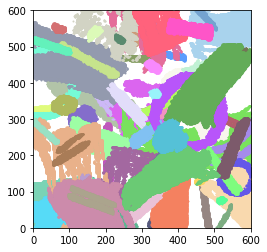

Randomly selected frame size: (600, 600)


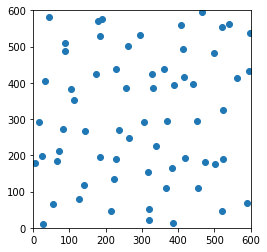

Num de brush strokes 64. Donde las coordenadas de los centroides[(17, 293), (407, 559), (113, 352), (498, 483), (215, 45), (456, 110), (320, 52), (590, 69), (368, 110), (441, 396), (327, 424), (87, 487), (597, 434), (525, 191), (33, 404), (417, 416), (503, 176), (6, 178), (599, 538), (224, 135), (388, 395), (25, 197), (562, 412), (140, 118), (257, 385), (230, 439), (88, 510), (55, 67), (72, 213), (338, 226), (128, 79), (144, 268), (185, 194), (369, 296), (230, 191), (174, 424), (238, 271), (184, 530), (525, 326), (475, 181), (419, 193), (266, 247), (307, 293), (382, 165), (465, 595), (82, 272), (179, 571), (318, 154), (387, 13), (295, 533), (45, 583), (452, 296), (27, 11), (261, 502), (321, 22), (522, 47), (415, 492), (190, 576), (521, 553), (105, 383), (542, 563), (66, 185), (360, 437), (330, 386)]:
brush strokes seleccionados de la db de bs: ['bsu_00047.jpg', 'bsu_00144.jpg', 'bsu_00117.jpg', 'bsu_00189.jpg', 'bsu_00166.jpg', 'bsu_00004.jpg', 'bsu_00043.jpg', 'bsu_00088.jpg', 'bsu_00

Array con los rgb de la paleta seleccionada [[[0.4473467918272434, 0.6825255349272781, 0.3615925620895624], [0.9524859549251478, 0.3375263874632282, 0.8977701617235168], [0.8656889911626395, 0.942859415691026, 0.5761885074708523], [0.3425448486952895, 0.5312397376605115, 0.9282830944913975], [0.8536719295948162, 0.45870083124539, 0.38879348522180585], [0.7829953417534795, 0.7540134050201757, 0.9987403799828217], [0.3338422523096318, 0.8937417388109022, 0.6705772048762859], [0.5361490905827372, 0.398134037594345, 0.6420615266291462], [0.635610185240208, 0.9429026039881618, 0.3393549629488628], [0.9895142683094602, 0.7757740105659385, 0.349728779305792], [0.9992267788493464, 0.9910679798823105, 0.951918636519026], [0.5071048427185183, 0.9565331618655589, 0.9626348243722563], [0.6957284735599725, 0.659563060700453, 0.5534239755322458], [0.9651192752988482, 0.5917393829780305, 0.6580492809845078], [0.3803012108938508, 0.3640817681799888, 0.3948778491104594], [0.561388878745892, 0.342610167

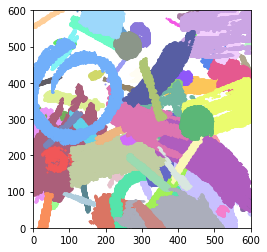

Randomly selected frame size: (400, 800)


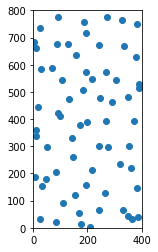

Num de brush strokes 66. Donde las coordenadas de los centroides[(218, 214), (389, 515), (111, 93), (386, 41), (99, 412), (6, 188), (25, 736), (362, 221), (388, 529), (185, 506), (105, 545), (86, 206), (245, 477), (68, 588), (30, 584), (200, 390), (384, 147), (127, 677), (194, 572), (32, 155), (269, 394), (157, 635), (84, 22), (5, 684), (147, 260), (328, 766), (211, 3), (19, 444), (243, 65), (90, 422), (172, 379), (217, 546), (273, 774), (131, 473), (241, 674), (46, 179), (332, 66), (194, 716), (291, 464), (11, 660), (89, 677), (175, 15), (11, 361), (267, 573), (318, 234), (9, 336), (169, 56), (276, 299), (365, 34), (50, 297), (381, 748), (142, 330), (26, 34), (153, 122), (379, 629), (242, 300), (334, 670), (265, 127), (348, 482), (354, 300), (186, 757), (193, 159), (348, 43), (306, 542), (373, 392), (92, 775)]:
brush strokes seleccionados de la db de bs: ['bsu_00060.jpg', 'bsu_00005.jpg', 'bsu_00128.jpg', 'bsu_00162.jpg', 'bsu_00084.jpg', 'bsu_00155.jpg', 'bsu_00078.jpg', 'bsu_00143.j

Array con los rgb de la paleta seleccionada [[[0.35985425354802764, 0.9867008719303471, 0.9484637875439126], [0.8320444331186653, 0.3349908272202841, 0.37731247464969675], [0.8558743519136889, 0.8616791945631258, 0.7185533243356949], [0.40245582345573666, 0.40935270118270267, 0.742887861983553], [0.48149608186309395, 0.6798141669552752, 0.40909381226482183], [0.9828121007334912, 0.34723034539348835, 0.9967797352128663], [0.9790673920417308, 0.5524136052213638, 0.5717029838451397], [0.6945944484618414, 0.9881150477003909, 0.44417369847547944], [0.6643885151443077, 0.5484583979110103, 0.8858752183411712], [0.34751369973957297, 0.8559847848654808, 0.6180999486895463], [0.8668131530993071, 0.7411452702215856, 0.3597530073645942], [0.3708694188369835, 0.3560548228121115, 0.380853271966755], [0.4417988473693431, 0.6707711904248649, 0.9780051321038584], [0.9972725600732627, 0.8149233103211598, 0.9792687862052233], [0.7056969313680138, 0.9443044435026419, 0.909592191062473], [0.808674937492662

UnidentifiedImageError: cannot identify image file './data/brush_strokes/00_bs_db/Untitled.ipynb'

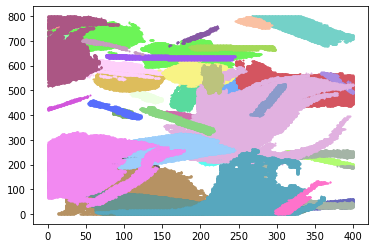

In [9]:
for k in range (10):
    paint_generator(k)

Randomly selected frame size: (400, 800)


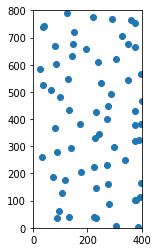

Num de brush strokes 66. Donde las coordenadas de los centroides[(399, 465), (277, 161), (273, 401), (147, 676), (396, 566), (348, 543), (87, 280), (80, 668), (173, 382), (36, 524), (397, 381), (375, 103), (225, 41), (393, 115), (374, 429), (231, 427), (228, 331), (230, 35), (105, 127), (339, 248), (134, 40), (349, 676), (177, 206), (249, 533), (40, 742), (225, 223), (304, 8), (327, 705), (143, 632), (151, 721), (97, 63), (243, 346), (379, 101), (84, 602), (385, 4), (238, 611), (117, 175), (277, 449), (35, 737), (305, 621), (89, 37), (66, 508), (278, 87), (127, 549), (81, 369), (360, 763), (72, 188), (297, 299), (398, 164), (196, 656), (99, 482), (286, 494), (221, 774), (272, 232), (374, 379), (141, 293), (132, 435), (375, 667), (125, 790), (374, 319), (27, 584), (390, 322), (34, 259), (376, 752), (291, 767), (230, 146)]:
brush strokes seleccionados de la db de bs: ['bsu_00119.jpg', 'bsu_00122.jpg', 'bsu_00162.jpg', 'bsu_00156.jpg', 'bsu_00091.jpg', 'bsu_00113.jpg', 'bsu_00081.jpg', 'b

Array con los rgb de la paleta seleccionada [[[0.5258328391502031, 0.8207993023643372, 0.7048007952837491], [0.9942238580149182, 0.4019894636243308, 0.9475291075822702], [0.4195196956024693, 0.3468289885189353, 0.37237743560989806], [0.960689422750488, 0.9697417151384754, 0.39106955423779466], [0.7397860044312269, 0.5565028049430315, 0.47610889049572697], [0.3946891897855584, 0.4180673196638662, 0.9030634415688322], [0.6705066208559828, 0.6517579122480051, 0.906072951326442], [0.9983185240012559, 0.9771241069701979, 0.9755142142083905], [0.979109202269608, 0.758450015428472, 0.6796462149633548], [0.34782724801183335, 0.7074737646669794, 0.46247191581982516], [0.685687867865927, 0.3606070943221043, 0.711135915011844], [0.982564121668201, 0.38999163734949555, 0.36857479006819394], [0.5367815680304027, 0.9515661337055432, 0.3495494104876556], [0.4546760282560794, 0.9704792548452726, 0.9332111838993189], [0.6732947419753703, 0.9781833722877865, 0.7928306271352245], [0.8904543849362829, 0.5

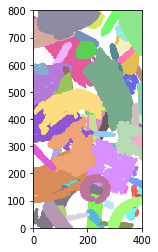

In [12]:
lst_imag=paint_generator(99)

number of brush strokes:66


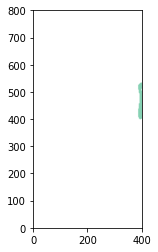

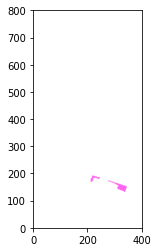

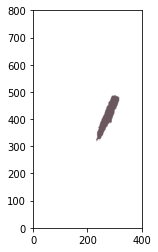

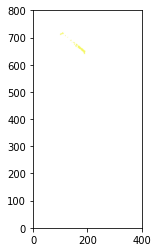

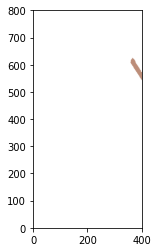

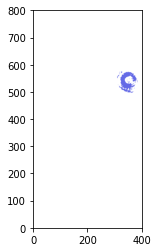

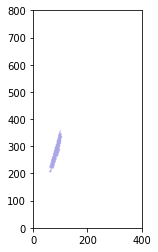

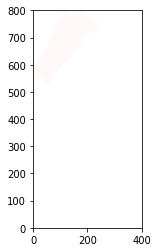

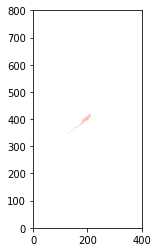

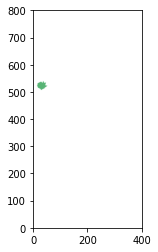

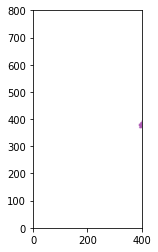

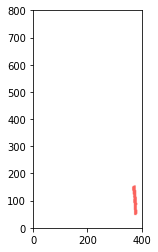

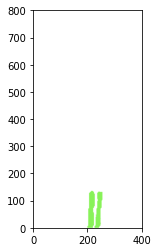

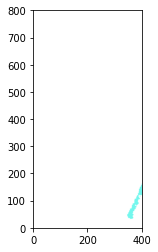

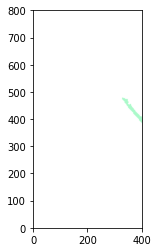

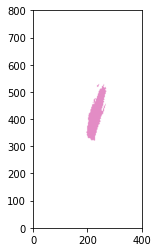

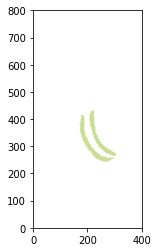

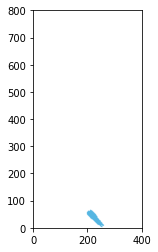

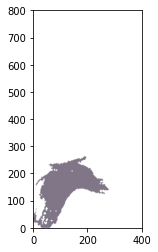

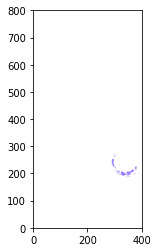

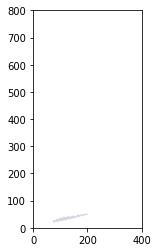

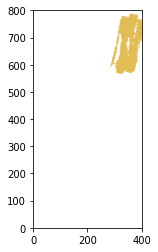

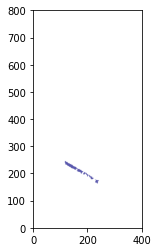

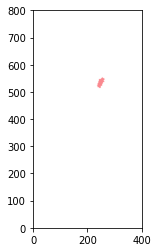

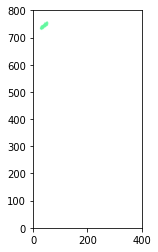

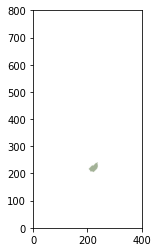

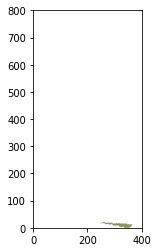

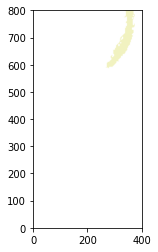

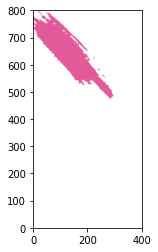

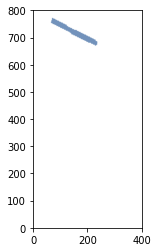

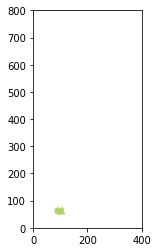

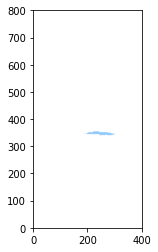

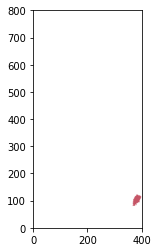

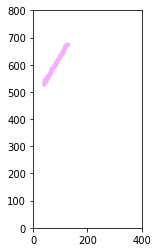

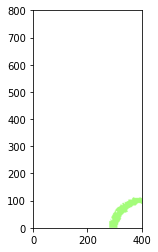

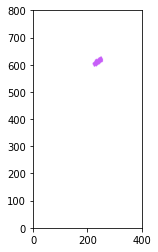

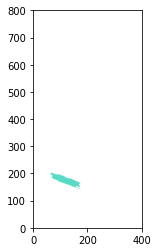

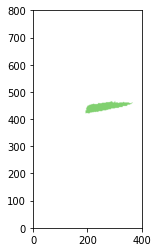

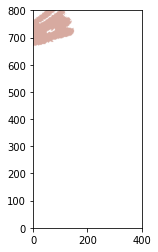

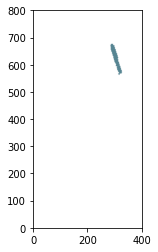

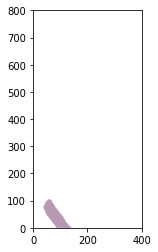

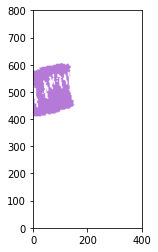

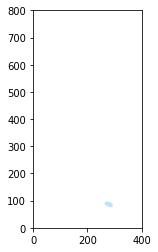

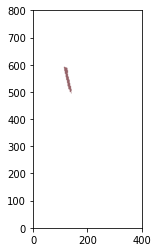

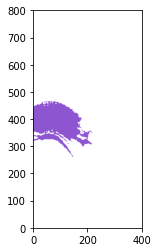

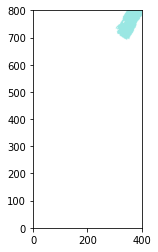

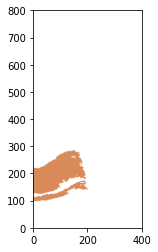

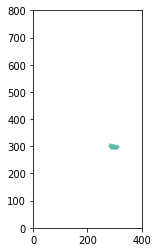

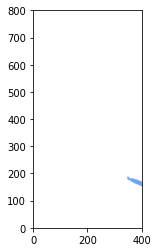

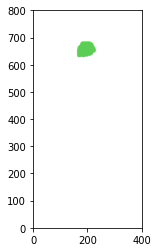

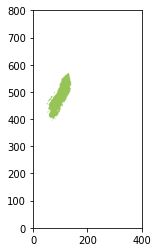

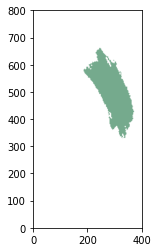

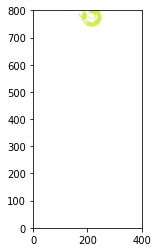

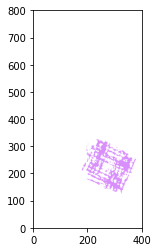

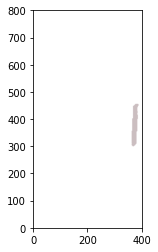

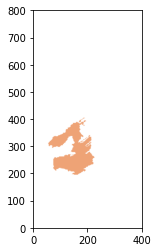

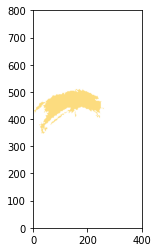

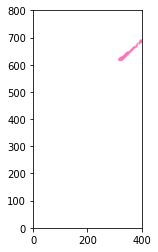

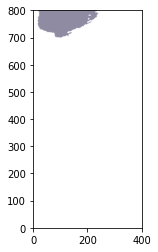

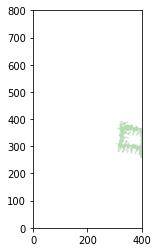

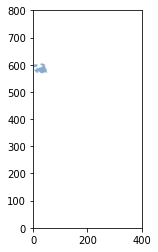

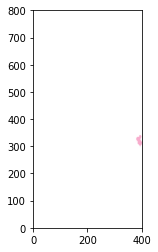

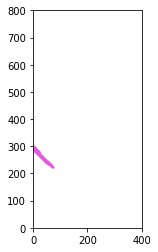

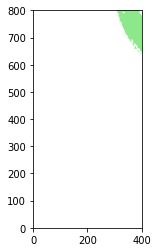

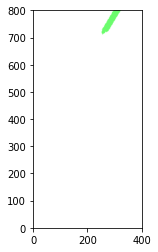

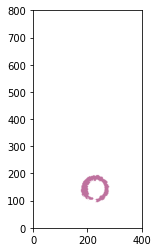

In [13]:
print("number of brush strokes:{0}".format(len(lst_imag)))
for k in range(len(lst_imag)):
    imag_k_t= lst_imag[k].transpose(1, 0, 2)
    #print(imag_k_t.shape)
    plt.axis([0, lst_imag[k].shape[0],0, lst_imag[k].shape[1]])
    plt.imshow(imag_k_t)
    plt.show()



In [14]:
#blank_image[1:10,1:20] +=[]

## OVERLAPING 

### curiosity 
https://stackoverflow.com/questions/60399182/testing-if-two-sprite-overlap-while-using-matrices



https://gis.stackexchange.com/questions/60017/how-to-computational-efficiently-check-if-there-are-any-overlapping-polygons-in
You can take advantage of matrix operations for this problem and achieve an O(n) time complexity.

The idea is to have an ones-and-zeros matrix e.g. mask per polygon. Then all you need to do is to add these matrices together(linear time and very efficiently if you use numpy sparse matrix). If there is a number greater than one it means there is overlap.

If you have two decimal points you can multiply by 100 to still be able to convert to a matrix.

You can extend the same solution to find out which ones are overlapping if you choose exponentially increasing numbers. For instance, the first polygon is a matrix of ones-and-zeros, the second is tens-and-zeros, third is hundreds and zeros, etc. this way if you have a 1000101 in a cell at the end it means polygons number 1, 3, and 7 overlap.


In [15]:
#find layers to assing by checking overlaping
#solution:overlaping recognition when:   
#sum(M1[ones to zeros]+M2[ones to zeros] transformed zeros to ones) <> product(M1[ones]+M2[ones])

lst_imag_deep=[]
for k in range(len(lst_imag)):
    imag_k_t= lst_imag[k]
    print('image',k)
    
    layer_found=0    
    
    if k==0:               
        lst_imag_deep.append(imag_k_t) 
        layer_found=1
        print('layer 0',len(lst_imag_deep)-1)
    else:
        max_layer_id=max(len(lst_imag_deep),0)
        for k_i in range(max_layer_id, 0 , -1):
            print('k_i=',k_i)
            imag_cmp=lst_imag_deep[k_i-1]

            #comparación la sum(M1[ones to zeros]+M2[ones to zeros]  zero to ones) <> product(M1+M2 ones)
            sum_acumM_newM0=np.where(imag_cmp==1,0,imag_cmp) + np.where(imag_k_t==1,0,imag_k_t)
            sum_acumM_newM= np.where(sum_acumM_newM0==0,1,sum_acumM_newM0)            
            product_acumM_newM=np.multiply(imag_cmp,imag_k_t)

            if (sum_acumM_newM==product_acumM_newM).all(): #no overlaping, if not in layer 0 then go to next layer
                if k_i-1 ==0:
                    lst_imag_deep[k_i-1]= sum_acumM_newM #in first layer,include the item in this layer
                    layer_found=1
                    print('layer k_i',k_i-1)
                    break
                else:
                    pass                
            else: #overlaping
                if k_i ==len(lst_imag_deep): #last layer, add a new one
                    lst_imag_deep.append(imag_k_t) 
                    layer_found=1
                    print('layer last1',len(lst_imag_deep)-1)
                    break
                else:#include the item in the layer +1                    
                    layer_1=np.multiply(lst_imag_deep[k_i + 1 - 1 ],imag_k_t)
                    lst_imag_deep[k_i + 1 - 1 ]= layer_1 #change layer for a new one with the new element 
                    layer_found=1
                    print('layer k_i+1 -1 ',k_i+1 -1 )
                    break
                pass   
            
    if layer_found==0: # not clasified yet, add new layer
        lst_imag_deep.append(imag_k_t) 
        print('layer last2',len(lst_imag_deep)-1)
    else:
        pass
    


image 0
layer 0 0
image 1
k_i= 1
layer k_i 0
image 2
k_i= 1
layer k_i 0
image 3
k_i= 1
layer k_i 0
image 4
k_i= 1
layer k_i 0
image 5
k_i= 1
layer k_i 0
image 6
k_i= 1
layer k_i 0
image 7
k_i= 1
layer last1 1
image 8
k_i= 2
k_i= 1
layer k_i 0
image 9
k_i= 2
layer last1 2
image 10
k_i= 3
k_i= 2
k_i= 1
layer k_i 0
image 11
k_i= 3
k_i= 2
k_i= 1
layer k_i 0
image 12
k_i= 3
k_i= 2
k_i= 1
layer k_i 0
image 13
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 14
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 15
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 16
k_i= 3
k_i= 2
layer k_i+1 -1  2
image 17
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 18
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 19
k_i= 3
layer last1 3
image 20
k_i= 4
k_i= 3
k_i= 2
layer k_i+1 -1  2
image 21
k_i= 4
k_i= 3
k_i= 2
k_i= 1
layer k_i+1 -1  1
image 22
k_i= 4
k_i= 3
k_i= 2
layer k_i+1 -1  2
image 23
k_i= 4
k_i= 3
k_i= 2
layer k_i+1 -1  2
image 24
k_i= 4
k_i= 3
k_i= 2
k_i= 1
layer k_i 0
image 25
k_i= 4
k_i= 3
k_i= 2
layer k_i+1 -

number of layers: 11


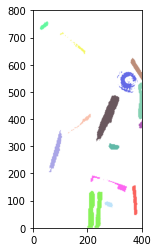

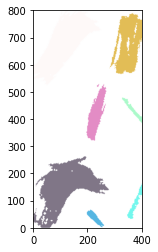

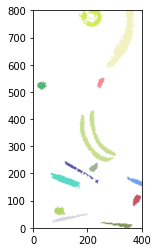

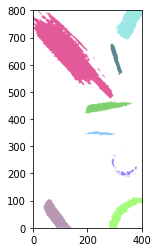

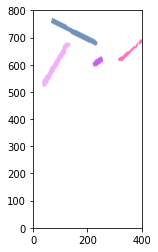

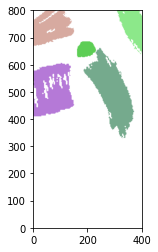

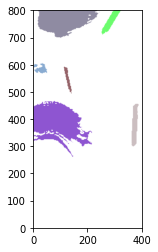

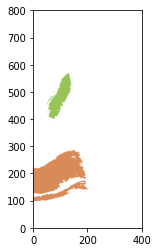

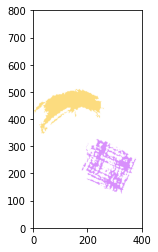

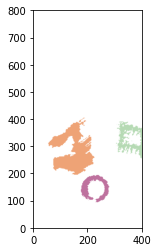

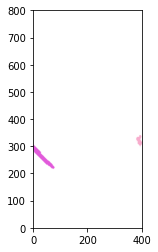

In [16]:
print("number of layers:",len(lst_imag_deep))
for k in range(len(lst_imag_deep)):
    imag_k_t= lst_imag_deep[k].transpose(1, 0, 2)
    #print(imag_k_t.shape)
    plt.axis([0, lst_imag_deep[k].shape[0],0, lst_imag_deep[k].shape[1]])
    plt.imshow(imag_k_t)
    plt.show()
    

____
____

#  Output - layers

 display the layers with the previous drawing beneath, in grey scale
____
____


# TRAINING DATA

Create the training / validation data

* first try: pictures with few strokes
* next steps: increase the num of strokes


The data can be handled as:
* image: a numpy array (x,y,[rgb]) and an array with the deepness
* dataset: columns x,y,r,g,b,stroke_id, deepness

## ¿?



extraction of the skeleton of a stroke
https://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html

curiosity:https://github.com/Huage001/PaintTransformer

____